# Neural Computing Coursework - Multilayer Perceptron (Testing)

This notebook will load the saved model from the training phase of the multilayer perceptron and test on imported test data.


In [ ]:
# PLEASE DO NOT RUN THIS CELL DURING TESTING
# Load the Drive helper and mount 
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import os
import pickle
from skorch import NeuralNetClassifier

In [ ]:
# PLEASE DO NOT RUN THIS CELL DURING TESTING
# Change directory to current directory
os.chdir("drive/My Drive/Neural Computing")

In [2]:
# Loading test dataset and preparing it
mnist_test = pd.read_csv("Data/mnist_test.csv")
y_test = mnist_test["label"]
X_test = mnist_test.drop("label", axis = 1)
X_test = X_test.astype("float32")
y_test = y_test.astype("int64")
X_test /= 255.0
X_test = X_test.to_numpy()
X_test = np.float32(X_test)
y_test = np.int64(y_test)

In [3]:
class Net5(nn.Module):
  def __init__(self):
    super(Net5, self).__init__()
    self.hidden = nn.Linear(784, 200)
    self.output = nn.Linear(200, 10)

  def forward(self, X, **kwargs):
    X = F.relu(self.hidden(X))
    X = F.softmax(self.output(X), dim=-1)
    return X

In [4]:
# Load model using pickle
with open("MLP_trained.pkl", "rb") as f:
  model = pickle.load(f)

In [5]:
# Making predictions on test set
y_pred = model.predict(X_test)

In [6]:
# Calculating prediction accuracy
accuracy_score(y_test, y_pred)

0.9305

In [7]:
# Calculating confusion matrix 
cf = confusion_matrix(y_test, y_pred)

In [8]:
# Calculating how many times a digit was misclassified
num_misclassified_list = list()
for i in range(cf.shape[0]):
  num_classified = 0
  for j in range(cf.shape[1]):
    if i != j:
      num_classified += cf[i,j]
  num_misclassified_list.append(num_classified)

for i in range(len(num_misclassified_list)):
  print("The digit {} was misclassified {} times".format(i, num_misclassified_list[i]))

print("Total number of misclassified digits: {}".format(sum(num_misclassified_list)))

The digit 0 was misclassified 20 times
The digit 1 was misclassified 15 times
The digit 2 was misclassified 156 times
The digit 3 was misclassified 88 times
The digit 4 was misclassified 58 times
The digit 5 was misclassified 35 times
The digit 6 was misclassified 59 times
The digit 7 was misclassified 97 times
The digit 8 was misclassified 89 times
The digit 9 was misclassified 78 times
Total number of misclassified digits: 695


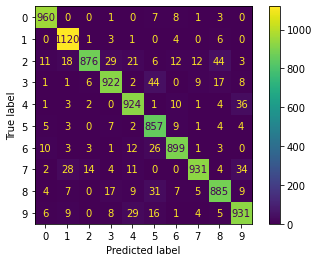

In [9]:
# Plot confusion matrix
plot_confusion_matrix(model, X_test, y_test)

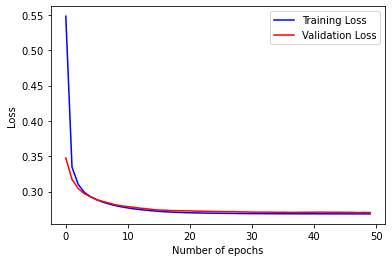

In [10]:
# Plot loss curves
plt.plot(model.history[:,"train_loss"], label="Training Loss", color='b')
plt.plot(model.history[:,"valid_loss"], label="Validation Loss", color='r')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()